# K-Means

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Customer.csv')
features = data.iloc[:, 2:5]

In [ ]:
features

,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,23,87,29
1,60,4,30
2,21,73,30
3,53,4,33
4,18,92,33
...,...,...,...
195,28,75,87
196,36,10,87
197,36,92,87
198,52,13,88


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

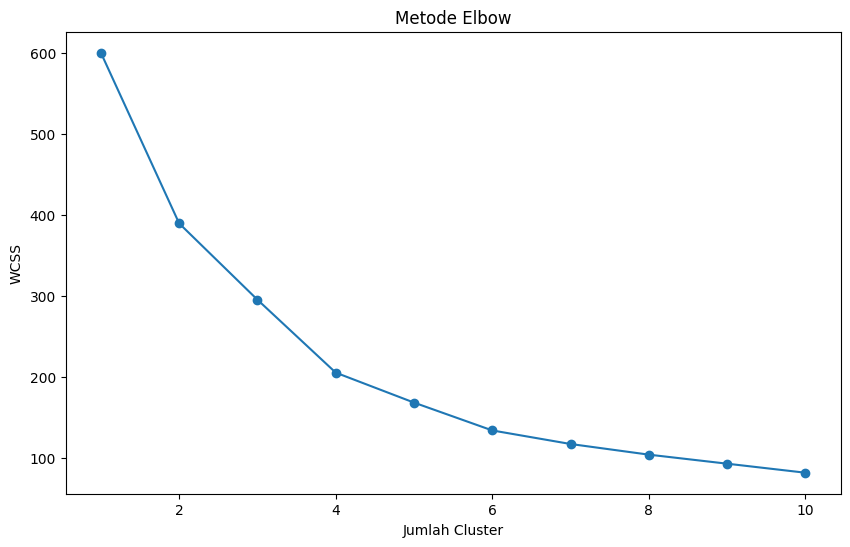

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   IDPelanggan    Kelamin  Usia  Rating_belanja (1-100)  Pendapatan (juta Rp)  \
0            1  Perempuan    23                      87                    29   
1            2       Laki    60                       4                    30   
2            3  Perempuan    21                      73                    30   
3            4       Laki    53                       4                    33   
4            5       Laki    18                      92                    33   

   Cluster  
0        2  
1        1  
2        2  
3        1  
4        2  

Cluster 0
       IDPelanggan       Usia  Rating_belanja (1-100)  Pendapatan (juta Rp)  \
count    41.000000  41.000000               41.000000             41.000000   
mean    161.341463  32.853659               79.975610             87.341463   
std      22.918998   3.811568               13.997299             17.985563   
min     123.000000  27.000000               18.000000             69.000000   
25%     143.000000  30.000000

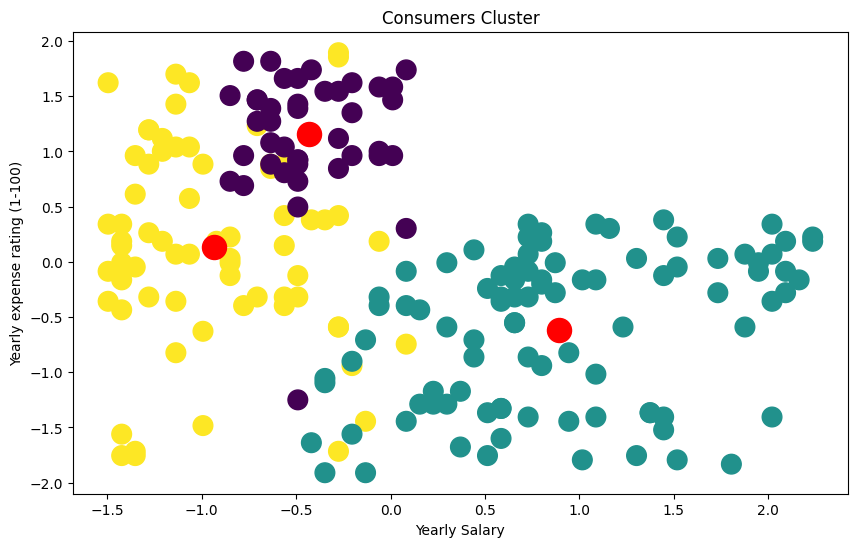

In [ ]:
# Dari plot elbow, kita memilih jumlah cluster yang tepat (misalnya 3)
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['Cluster'] = clusters

print(data.head())
for i in range(optimal_clusters):
    print(f'\nCluster {i}')
    print(data[data['Cluster'] == i].describe())

plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, s=200)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300)


plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.show()

# Hierachical

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import seaborn as sns


data = pd.read_csv('Customer.csv')
features = data.iloc[:, 2:5]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

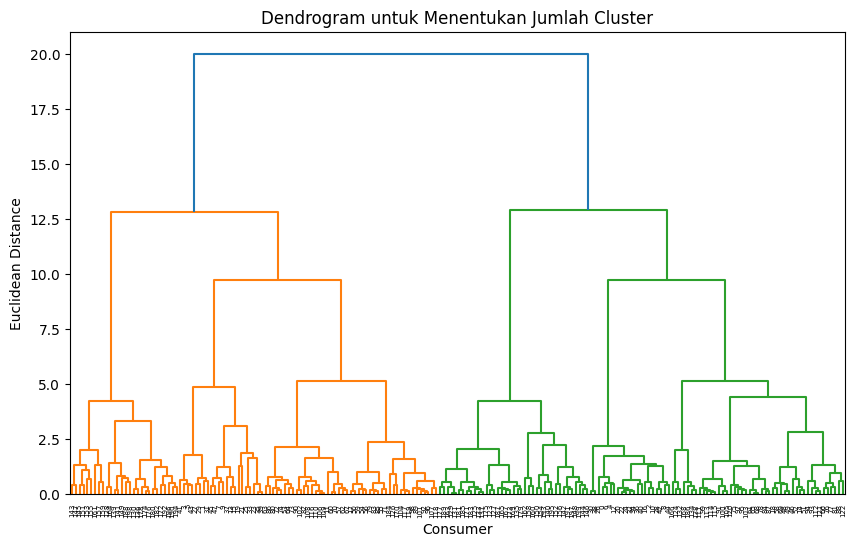

In [ ]:
Z = linkage(scaled_features, method='ward')


plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram untuk Menentukan Jumlah Cluster')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
optimal_clusters = 3
hierarchical_clusters = fcluster(Z, optimal_clusters, criterion='maxclust')
data['Hierarchical_Cluster'] = hierarchical_clusters

print(data.head())
for i in range(1, optimal_clusters + 1):
    print(f'\nHierarchical Cluster {i}')
    print(data[data['Hierarchical_Cluster'] == i].describe())

   IDPelanggan    Kelamin  Usia  Rating_belanja (1-100)  Pendapatan (juta Rp)  \
0            1  Perempuan    23                      87                    29   
1            2       Laki    60                       4                    30   
2            3  Perempuan    21                      73                    30   
3            4       Laki    53                       4                    33   
4            5       Laki    18                      92                    33   

   Hierarchical_Cluster  
0                     3  
1                     1  
2                     3  
3                     1  
4                     3  

Hierarchical Cluster 1
       IDPelanggan       Usia  Rating_belanja (1-100)  Pendapatan (juta Rp)  \
count    95.000000  95.000000               95.000000             95.000000   
mean     95.431579  49.915789               32.515789             59.063158   
std      57.145885  11.298336               17.679693             26.758101   
min       2.00000

In [ ]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_features)

data['KMeans_Cluster'] = kmeans_clusters

for i in range(optimal_clusters):
    print(f'\nK-Means Cluster {i}')
    print(data[data['KMeans_Cluster'] == i].describe())



K-Means Cluster 0
       IDPelanggan       Usia  Rating_belanja (1-100)  Pendapatan (juta Rp)  \
count    41.000000  41.000000               41.000000             41.000000   
mean    161.341463  32.853659               79.975610             87.341463   
std      22.918998   3.811568               13.997299             17.985563   
min     123.000000  27.000000               18.000000             69.000000   
25%     143.000000  30.000000               74.000000             75.000000   
50%     162.000000  32.000000               83.000000             79.000000   
75%     180.000000  36.000000               90.000000             97.000000   
max     200.000000  40.000000               97.000000            137.000000   

       Hierarchical_Cluster  KMeans_Cluster  
count             41.000000            41.0  
mean               2.000000             0.0  
std                0.223607             0.0  
min                1.000000             0.0  
25%                2.000000            

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


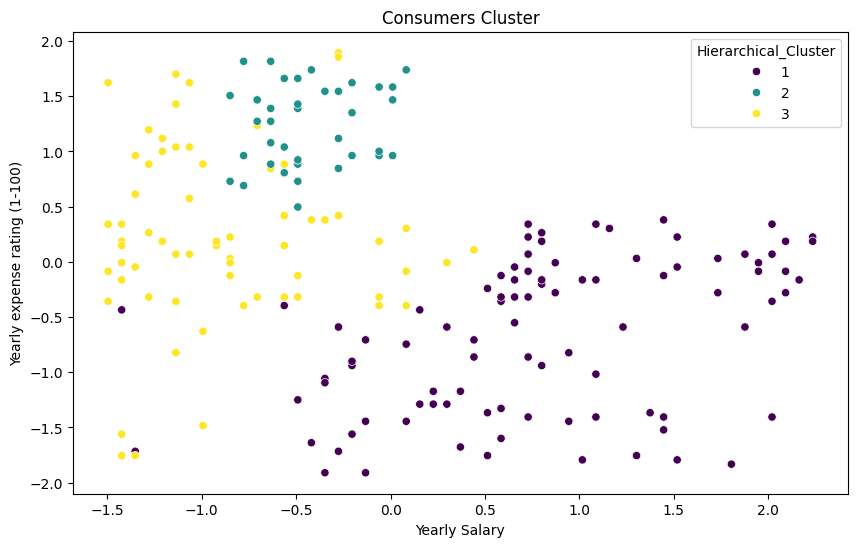

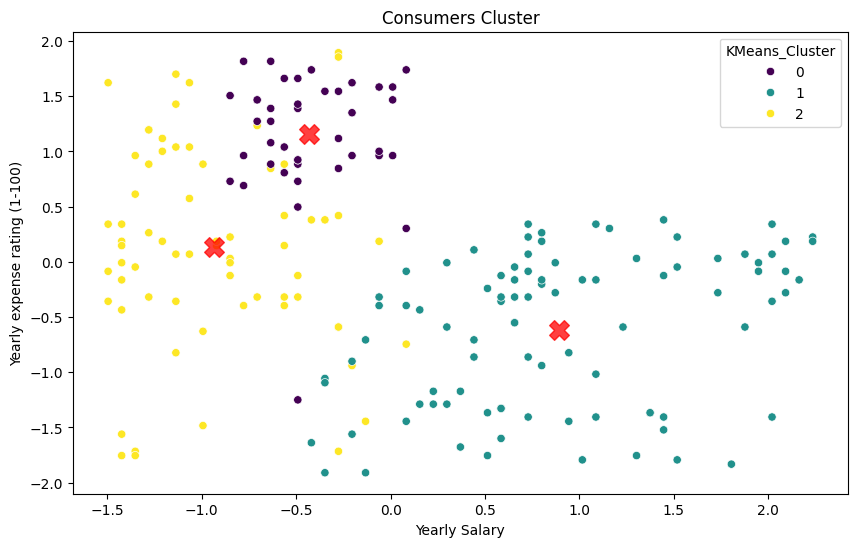

In [ ]:
# Membuat scatter plot hasil hierarchical clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['Hierarchical_Cluster'], palette='viridis')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.show()

# Membuat scatter plot hasil K-Means clustering dengan centroid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['KMeans_Cluster'], palette='viridis')

# Plot titik centroid K-Means
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.show()


Perbedaan clustering pelanggan dapat diamati setelah clustering menggunakan K-Means dan  clustering hierarki. Pengelompokan K-means membagi data menjadi beberapa cluster berdasarkan minimalisasi inersia (jumlah jarak kuadrat). Hal ini cenderung menghasilkan kelompok bulat  dengan ukuran  seragam. Pengelompokan hierarki, di sisi lain, menggunakan metode Ward untuk mempartisi data berdasarkan jarak hierarki, memungkinkan Anda mengidentifikasi cluster dengan bentuk dan ukuran yang lebih beragam. Hasil visualisasi menunjukkan bahwa kedua metode memungkinkan data dikelompokkan ke dalam beberapa cluster yang berbeda, namun komposisi dan batas antar cluster mungkin berbeda. Hal ini memberikan wawasan tambahan tentang struktur data dan memungkinkan department store  memilih metode terbaik berdasarkan tujuan spesifiknya dan interpretasi yang diinginkan dari hasil pengelompokan.